In [3]:
import sys
sys.path.append("../")
# TODO work on imports
#from mir.distances import graph
import pandas as pd
import time
from plotnine import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

In [4]:
comp_dict = {'S1': 0, 'S2': 1, 'P1': 2, 'P2': 3, 'Q1': 4, 'Q2': 5}

comp_dict = {num: pat for num, pat in zip(comp_dict.values(), comp_dict.keys())}

pats = ['S1', 'S2', 'P1', 'P2', 'Q1', 'Q2']

In [5]:
def generate_masks(seq):
    
    masks = set()
    for i in range(len(seq)):
        clone_to_search = seq[: i] + 'X' + seq[i + 1:]
        masks.add(clone_to_search)
    return masks

In [6]:
def process_one_lenght(masks_series):
    
    res_list = []
    print(f'processing lenghts {len(masks_series.index[0])} started')
    while len(masks_series) > 50:
        cur_clust = set()
        cur_masks = set()

        cur_clust.add(masks_series.index[0])
        cur_masks = cur_masks.union(masks_series.iloc[0])


        for cdr3, masks in masks_series.items():

            if cur_masks.intersection(masks):
                cur_masks = cur_masks.union(masks)
                cur_clust.add(cdr3)

        masks_series.drop(list(cur_clust), inplace = True)
        res_list.append(cur_clust)
    print(f'processing lenghts {len(cdr3)} completed')
    return res_list

In [7]:
from multiprocessing import Pool

# top_all = top_all.loc[top_all.cdr3aa.drop_duplicates().index]

def process_all_lenghts(top_all):
        
    len_dist = top_all.cdr3aa.apply(len).value_counts()
    
    lenghts_dfs = []
    for i in len_dist[len_dist > 500].index:
        top_all_i = top_all[top_all.cdr3aa.apply(lambda x: len(x) == i)]

        top_all_i_masks = top_all_i.cdr3aa.apply(lambda x: generate_masks(x))
        top_all_i_masks.index = top_all_i.cdr3aa
        lenghts_dfs.append(top_all_i_masks)
        
    print('Start processing')
    with Pool(len(lenghts_dfs)) as p:
        res_list = list(p.map(process_one_lenght, lenghts_dfs))
    
    return sum(res_list, [])

# Clustreing all together. Presampled

S1 8227


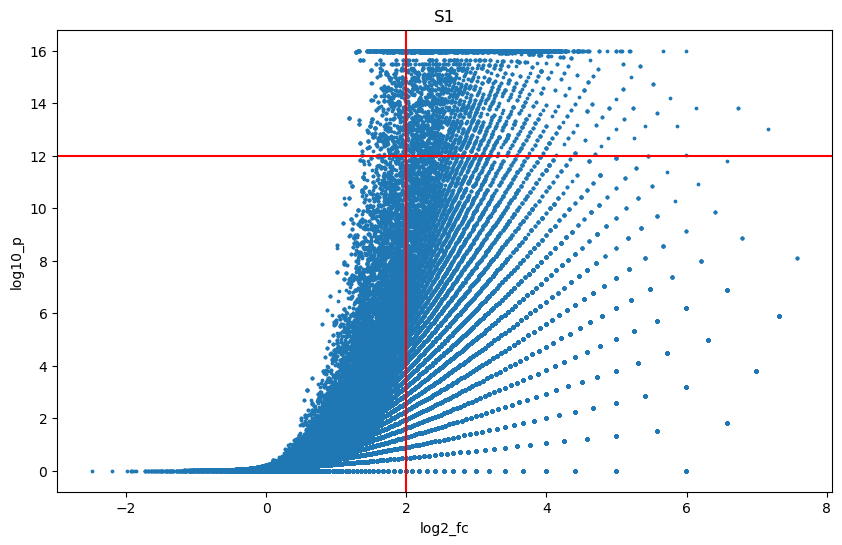

S2 5339


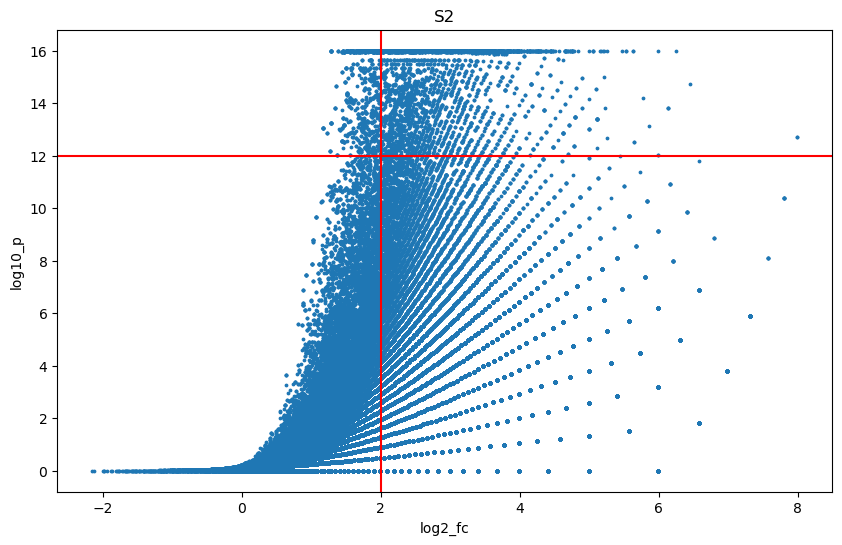

P1 8417


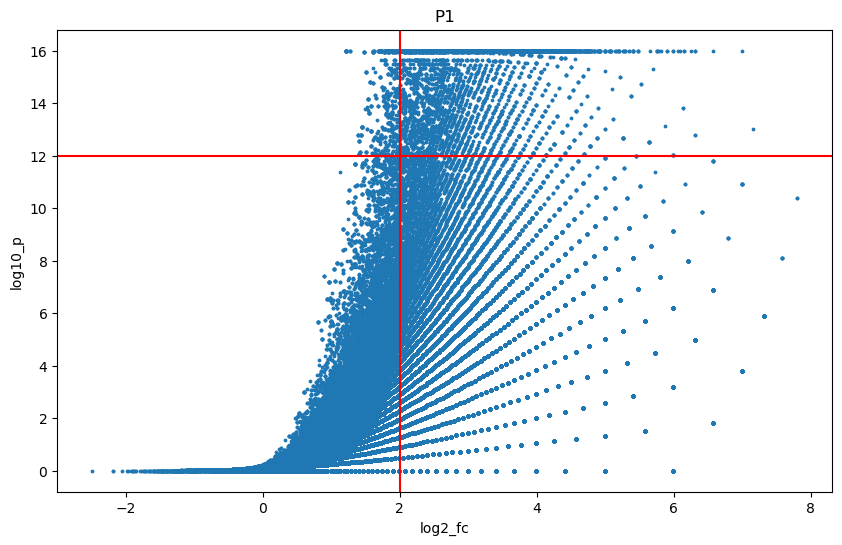

P2 5694


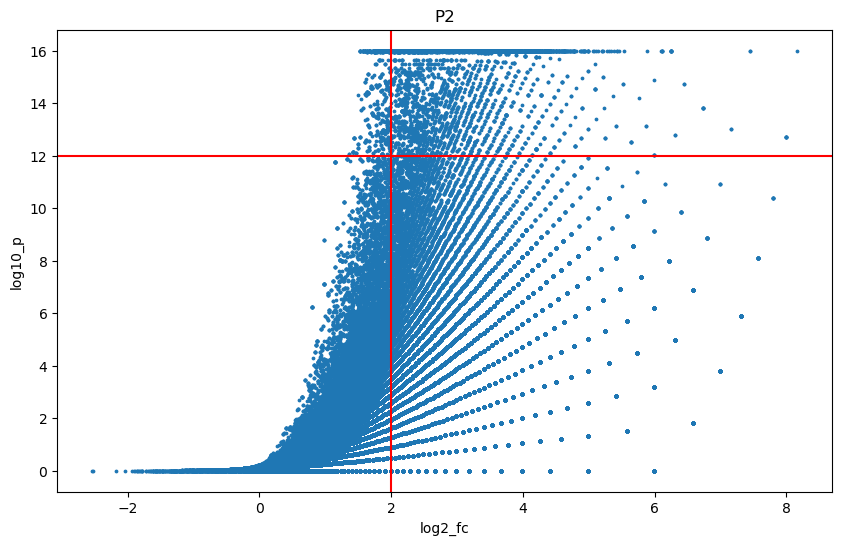

Q1 10372


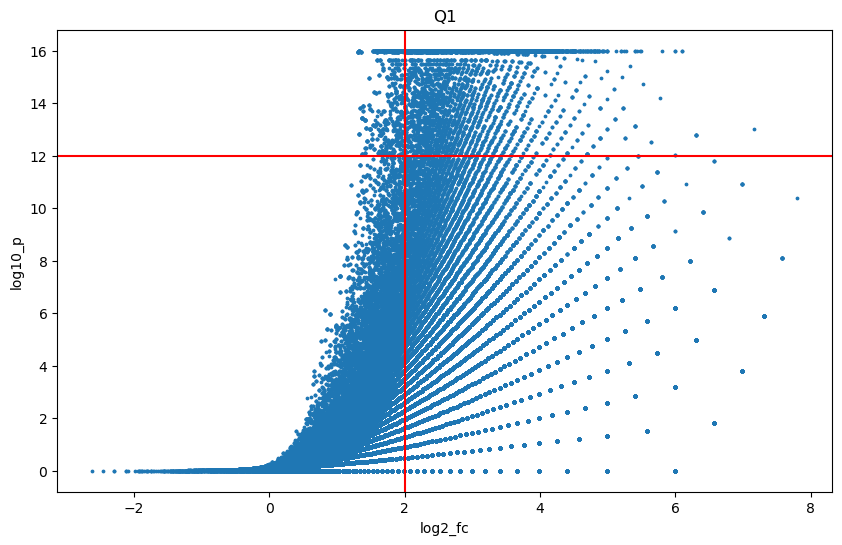

Q2 8324


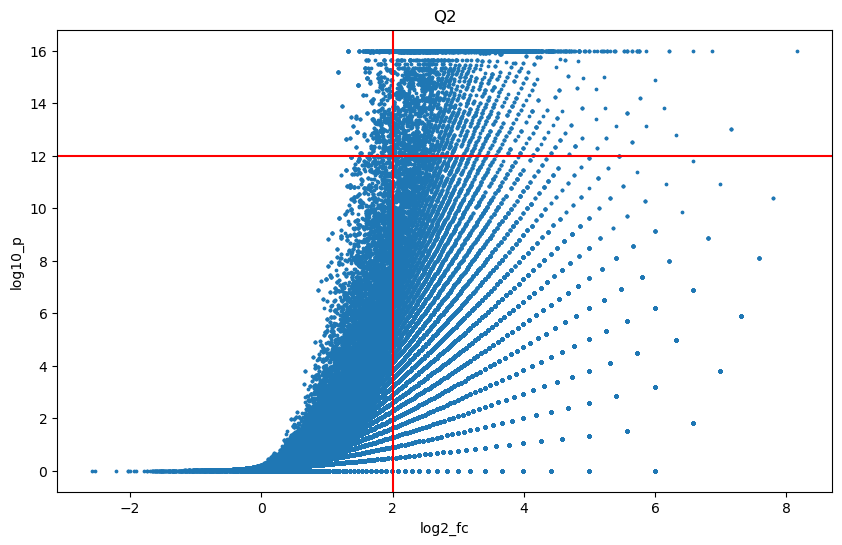

S1 7624


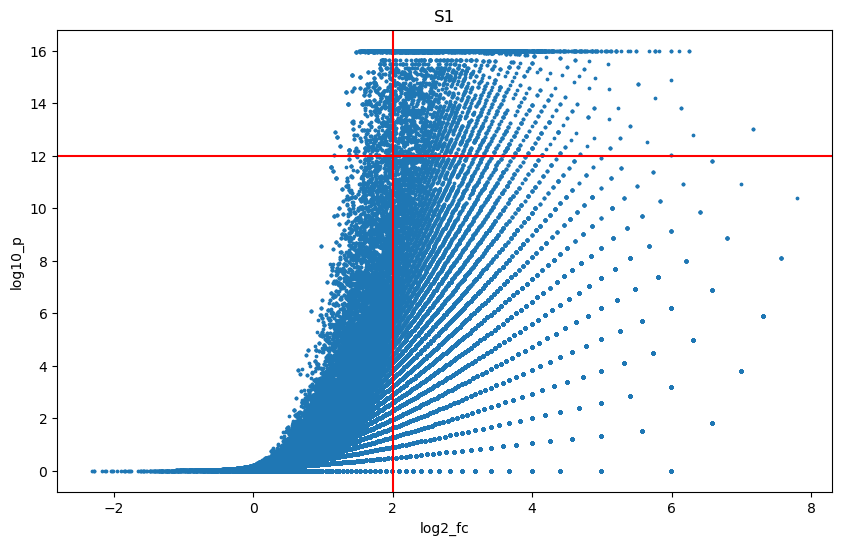

S2 5174


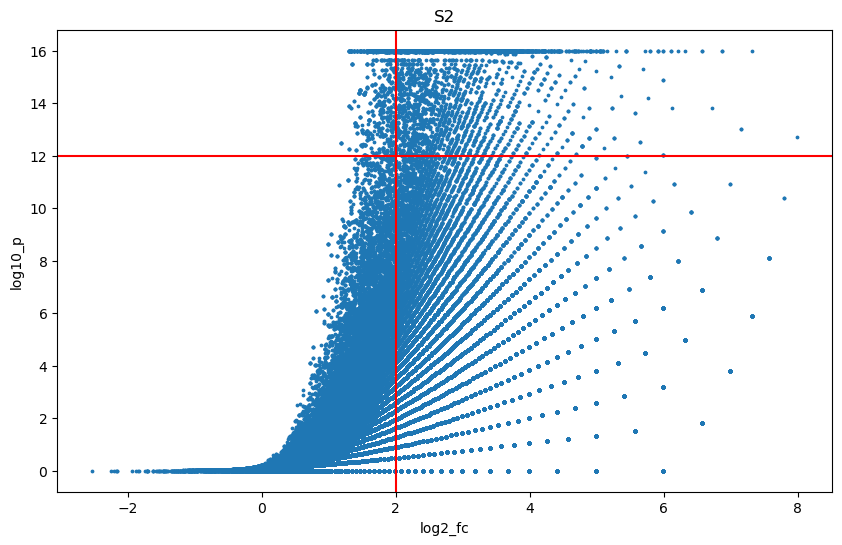

P1 7356


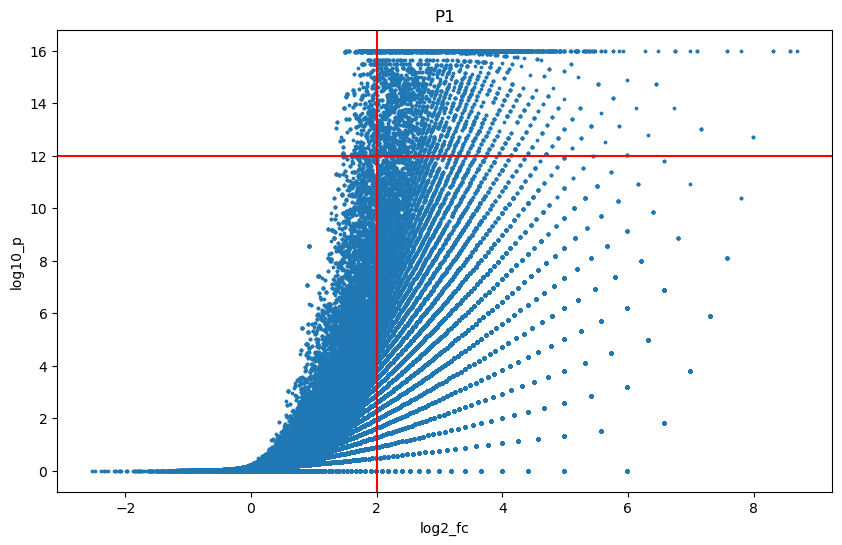

P2 6919


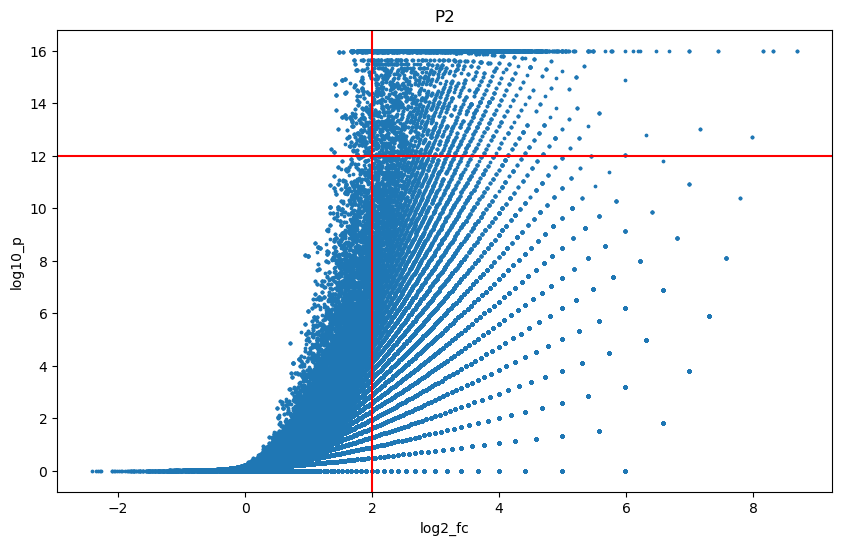

Q1 9471


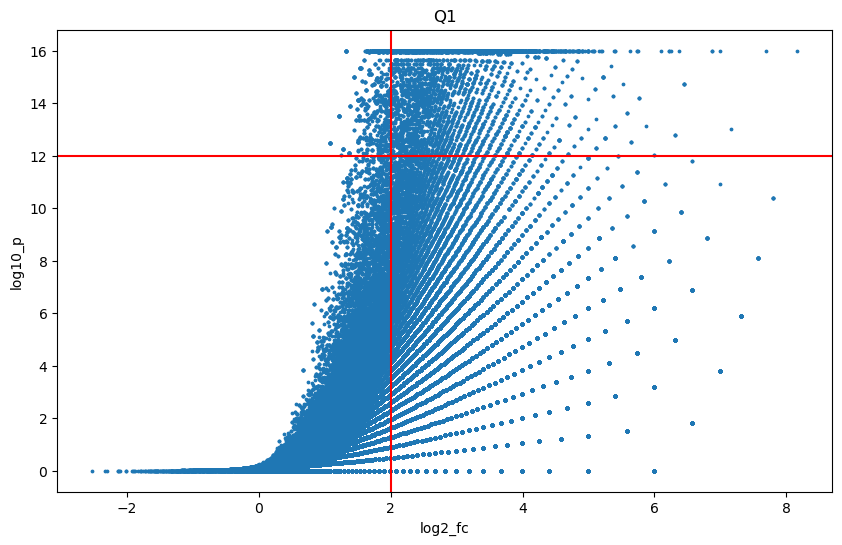

Q2 6154


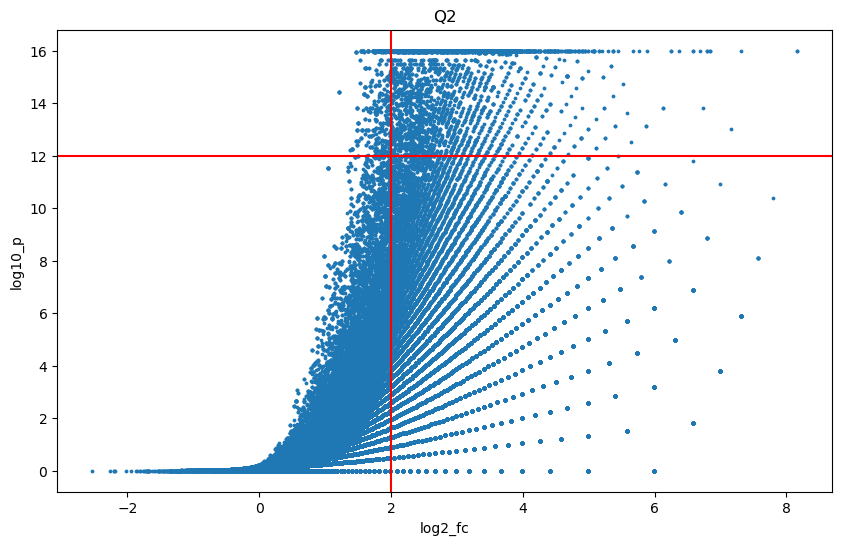

,cdr3,cluster_id,pat,log10_p,log2_fc,count,freq,cdr3nt,cdr3aa,v,...,DEnd,JStart,degree.s,group.count.s,group2.count.s,degree.c,group.count.c,group2.count.c,p.value.g,p.value.g2
0,CASSEGQGAYNEQFF,198,S1pre,13.246664,3.684244,1,0.000002,TGTGCCAGCAGTGAGGGACAGGGTGCGTACAATGAGCAGTTCTTC,CASSEGQGAYNEQFF,TRBV6-2,...,-1,-1,18,306553,437,46,9748051,2738,5.666780e-14,8.092159e-04
1,CASSFGQGNTEAFF,0,S1pre,16.000000,2.506706,1,0.000002,TGTGCCAGCAGCTTCGGACAGGGAAACACTGAAGCTTTCTTT,CASSFGQGNTEAFF,TRBV5-4,...,-1,-1,41,306553,144,234,9748051,3081,0.000000e+00,3.918594e-12
2,CASRPSSYNEQFF,461,S1pre,13.240811,2.649868,1,0.000002,TGTGCCAGCAGGCCTAGCTCCTACAATGAGCAGTTCTTC,CASRPSSYNEQFF,TRBV4-2,...,-1,-1,29,306553,73,151,9748051,877,5.743664e-14,6.991099e-05
3,CASSLSGGSYEQYF,1,S1pre,16.000000,2.089195,1,0.000002,TGTGCCAGCAGCTTATCCGGGGGCTCCTACGAGCAGTACTTC,CASSLSGGSYEQYF,TRBV7-6,...,-1,-1,92,306553,181,694,9748051,3345,0.000000e+00,6.994405e-14
4,CASSRDSYNEQFF,461,S1pre,15.954587,2.104910,1,0.000002,TGTGCCAGTAGTAGGGACAGCTACAATGAGCAGTTCTTC,CASSRDSYNEQFF,TRBV19,...,-1,-1,50,306553,342,376,9748051,5171,1.110231e-16,6.968643e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88749,CASSLGLAGQETQYF,198,Q2,12.125794,2.390993,1,0.000001,TGTGCCAGCAGCTTAGGGTTGGCAGGACAAGAGACCCAGTACTTC,CASSLGLAGQETQYF,TRBV7-2,...,-1,-1,31,306553,545,193,9748051,2690,7.485244e-13,9.255572e-01
88750,CASSLGGANTGELFF,198,Q2,16.000000,2.520015,1,0.000001,TGTGCCAGCAGCTTAGGCGGCGCGAACACCGGGGAGCTGTTTTTT,CASSLGGANTGELFF,TRBV7-9,...,-1,-1,56,306553,279,315,9748051,3486,0.000000e+00,1.060750e-07
88751,CASSLGLAANNEQFF,198,Q2,16.000000,4.789272,1,0.000001,TGTGCCAGCAGCCTCGGTCTAGCCGCAAACAATGAGCAGTTCTTC,CASSLGLAANNEQFF,TRBV7-2,...,-1,-1,19,306553,981,22,9748051,3693,0.000000e+00,2.268794e-05
88752,CASSLGLYNEQFF,461,Q2,16.000000,2.283459,1,0.000001,TGTGCCAGCAGCCTGGGACTATACAATGAGCAGTTCTTC,CASSLGLYNEQFF,TRBV7-3,...,-1,-1,78,306553,288,515,9748051,4330,0.000000e+00,1.320749e-10


In [9]:
all_pats_top = pd.DataFrame()

for pat in comp_dict.values():

    
    #data_pat = pd.read_csv(f'/home/dluppov/twins_sampled/{pat}_pre0_F1_sampled/{pat}_pre0_F1_sampled.txt', sep = '\t')
    data_pat = pd.read_csv(f'/home/dluppov/twins_properly_sampled/{pat}_pre/{pat}_pre.txt', sep = '\t')
    
    
    fold = ((data_pat['degree.s'] + 1)/data_pat['group.count.s'])/((data_pat['degree.c'] + 1)/data_pat['group.count.c'])
    log2_fc = np.log2(fold)
    log10_p = -np.log10(data_pat['p.value.g'].apply(lambda x: x if x > 10**(-16) else 10**(-16)))
    
    
    data_pat.insert(0, 'log2_fc', log2_fc)
    data_pat.insert(0, 'log10_p', log10_p)
    
    data_pat = data_pat[np.logical_and(data_pat.log2_fc > 2, data_pat.log10_p > 12)]
    #data_pat = data_pat.sample(n = 2*10**3, replace = False)
    data_pat.insert(0, 'pat', pat + 'pre')
    
    print(pat, len(data_pat))
    
    plt.figure(figsize=(10, 6))
    plt.title(pat)
    plt.scatter(log2_fc, log10_p, s = 3)
    plt.axvline(2, c = 'r')
    plt.axhline(12, c='r')
    plt.xlabel('log2_fc')
    plt.ylabel('log10_p')
    plt.show()
    
    
    all_pats_top = pd.concat([all_pats_top, data_pat])
    
for pat in comp_dict.values():

    
    #data_pat = pd.read_csv(f'/home/dluppov/twins_sampled/{pat}_0_concutedsampled/{pat}_0_concutedsampled.txt', sep = '\t')
    
    data_pat = pd.read_csv(f'/home/dluppov/twins_properly_sampled/{pat}_0/{pat}_0.txt', sep = '\t')
    
    fold = ((data_pat['degree.s'] + 1)/data_pat['group.count.s'])/((data_pat['degree.c'] + 1)/data_pat['group.count.c'])
    log2_fc = np.log2(fold)
    log10_p = -np.log10(data_pat['p.value.g'].apply(lambda x: x if x > 10**(-16) else 10**(-16)))
    
    
    data_pat.insert(0, 'log2_fc', log2_fc)
    data_pat.insert(0, 'log10_p', log10_p)
    
    data_pat = data_pat[np.logical_and(data_pat.log2_fc > 2, data_pat.log10_p > 12)]
    #data_pat = data_pat.sample(n = 2*10**3, replace = False)
    data_pat.insert(0, 'pat', pat)
    
    print(pat, len(data_pat))
    
    plt.figure(figsize=(10, 6))
    plt.title(pat)
    plt.scatter(log2_fc, log10_p, s = 3)
    plt.axvline(2, c = 'r')
    plt.axhline(12, c='r')
    plt.xlabel('log2_fc')
    plt.ylabel('log10_p')
    plt.show()
    
    
    all_pats_top = pd.concat([all_pats_top, data_pat])
    

start = time.time()
res = process_all_lenghts(all_pats_top)
end = time.time()

print('Parallel process hamming', end - start)
print(len(res[0].union(*res)))

pd.Series(res).to_csv('/home/dluppov/twins_analysis/cluster_counts_whole_samp_mixed_pos_presamp_2.csv')    

res = pd.read_csv('/home/dluppov/twins_analysis/cluster_counts_whole_samp_mixed_pos_presamp_2.csv', index_col=0)
res = res['0'].apply(eval)

exploded_series = res.explode()

res_exploded = pd.DataFrame(exploded_series).reset_index()
res_exploded.rename(columns = {"0": 'cdr3', 'index': 'cluster_id'}, inplace=True)
res_exploded.set_index('cdr3', inplace=True)

cdr3_set = set(res_exploded.index)

all_pats_top = all_pats_top.loc[all_pats_top.cdr3aa.apply(lambda x: x in cdr3_set)]


to_plot_conc = pd.concat([res_exploded.loc[list(all_pats_top.cdr3aa)].reset_index(), all_pats_top.reset_index(drop=True)], axis = 1)
to_plot_conc

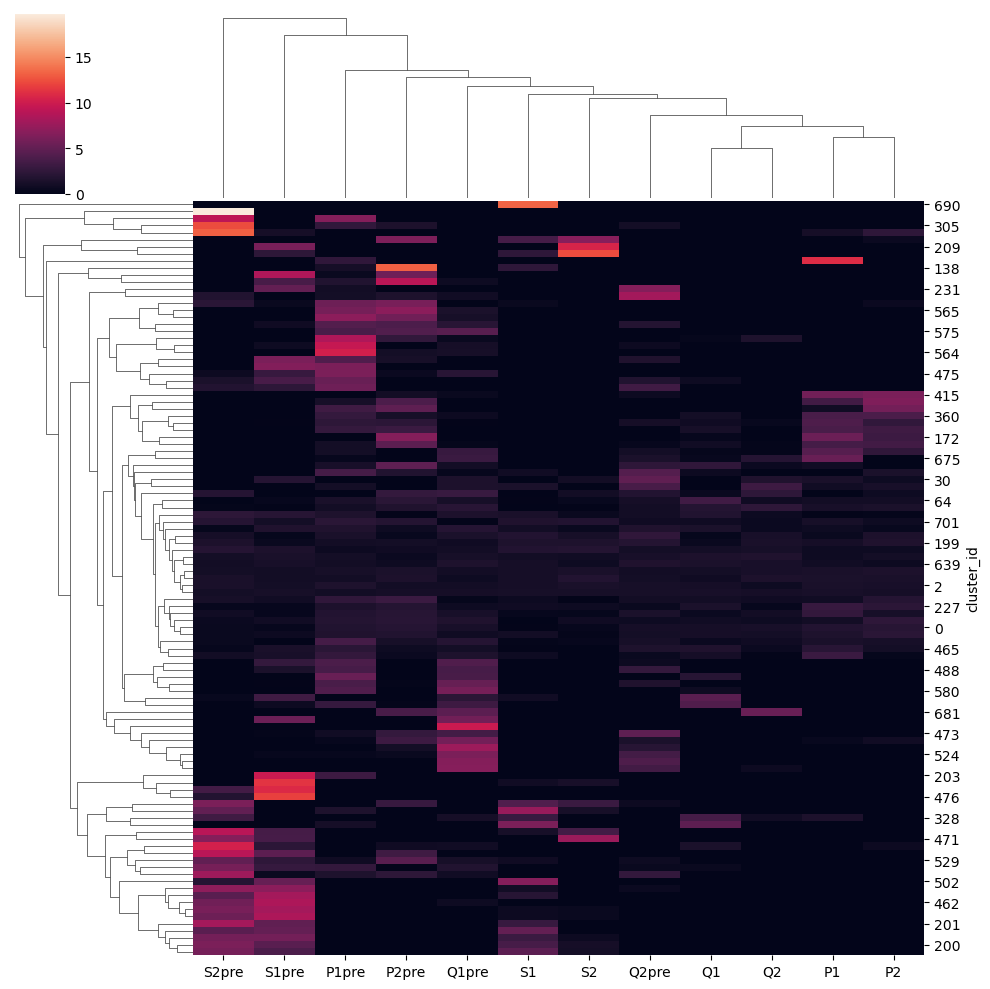

In [10]:
to_plot_conc = pd.concat([res_exploded.loc[list(all_pats_top.cdr3aa)].reset_index(), all_pats_top.reset_index(drop=True)], axis = 1)




pats = ['S1','S2', 'S1pre','S2pre', 'Q1','Q2', 'Q1pre','Q2pre', 'P1','P2', 'P1pre','P2pre']

clusters_size_dict = to_plot_conc.cluster_id.value_counts().to_dict()

to_plot_conc.insert(0, 'cluster_size', to_plot_conc.cluster_id.apply(lambda x: clusters_size_dict[x]))

dummies_conc = pd.concat([to_plot_conc.drop('pat', axis = 1), pd.get_dummies(to_plot_conc.pat)], axis = 1)
dummies_conc = dummies_conc[dummies_conc.cluster_size > 10]

cluster_counts = dummies_conc[['cluster_id'] + pats].groupby('cluster_id').apply(sum).drop('cluster_id', axis = 1)
cluster_counts.insert(0, 'total_count', cluster_counts.sum(axis = 1))

cluster_freqs = cluster_counts.apply(lambda x: x/cluster_counts.total_count).drop('total_count', axis = 1)

cluster_freqs_advanced = cluster_freqs*10**5/cluster_counts[cluster_freqs.columns].sum()
sns.clustermap(cluster_freqs_advanced)

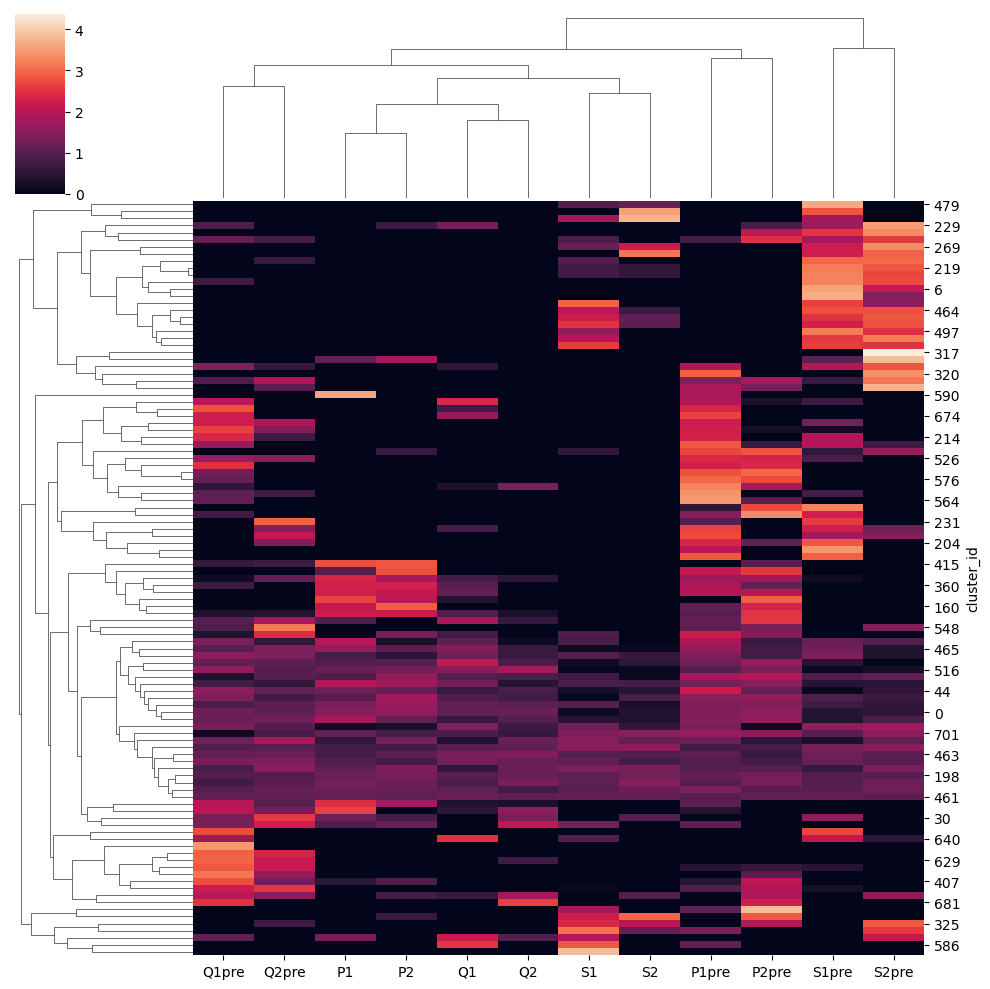

In [11]:
cluster_freqs_advanced_log = cluster_freqs_advanced.applymap(lambda x: np.log2(x+1))
sns.clustermap(cluster_freqs_advanced_log)

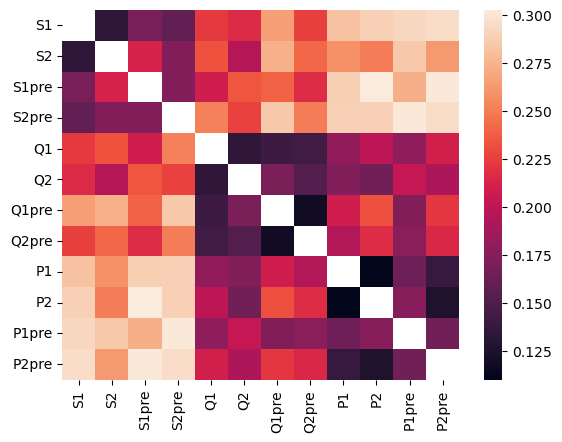

In [18]:
import scipy as scp
scp.spatial.distance.jensenshannon((cluster_counts/cluster_counts.sum()).P1, (cluster_counts/cluster_counts.sum()).S2)

jensenshannon_dict_dif = {}
for pat in pats:
    jensenshannon_dict_dif[pat] = {}
    for pat1 in pats:
        jensenshannon_dict_dif[pat][pat1] =  scp.spatial.distance.jensenshannon((cluster_counts/cluster_counts.sum())[pat],
                                                                                (cluster_counts/cluster_counts.sum())[pat1])
        
sns.heatmap(pd.DataFrame(jensenshannon_dict_dif).applymap(lambda x: np.nan if x == 0 else x))

plt.savefig('/home/dluppov/Paper_figs/Fig11/fig11a.svg', format = 'svg')

In [20]:
freqs_data = cluster_counts/cluster_counts.sum()
freqs_data.drop('total_count', inplace = True, axis = 1)

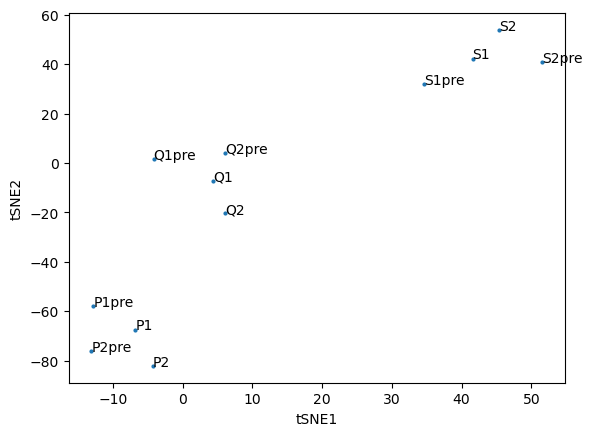

In [21]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2,  perplexity = 3)
tsne_res = tsne.fit_transform(freqs_data.T).T

fig, ax = plt.subplots()
ax.scatter(tsne_res[0], tsne_res[1], s=4)

for i, txt in enumerate(freqs_data.columns):
    ax.annotate(txt, (tsne_res[0][i], tsne_res[1][i]))

plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

plt.savefig('/home/dluppov/Paper_figs/Fig11/fig11b.svg', format = 'svg')

# Clustering all together. Presampled. Olga

S1 69837


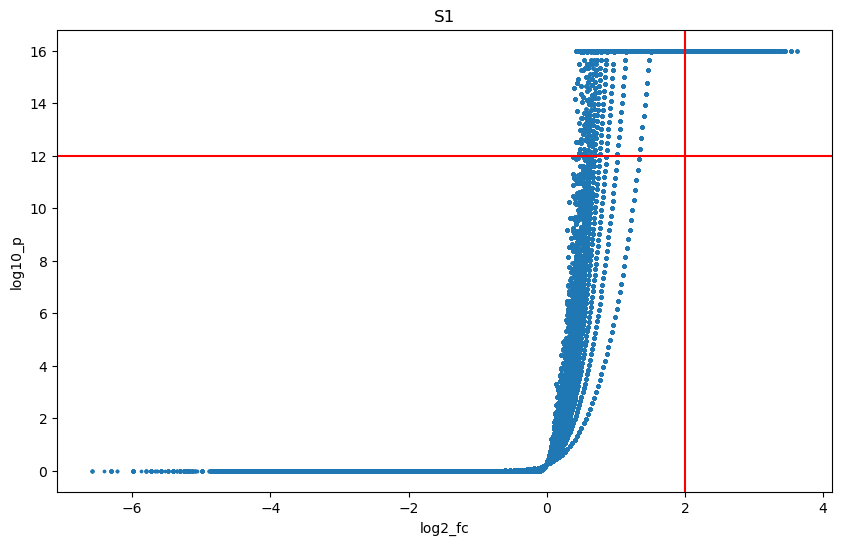

S2 69475


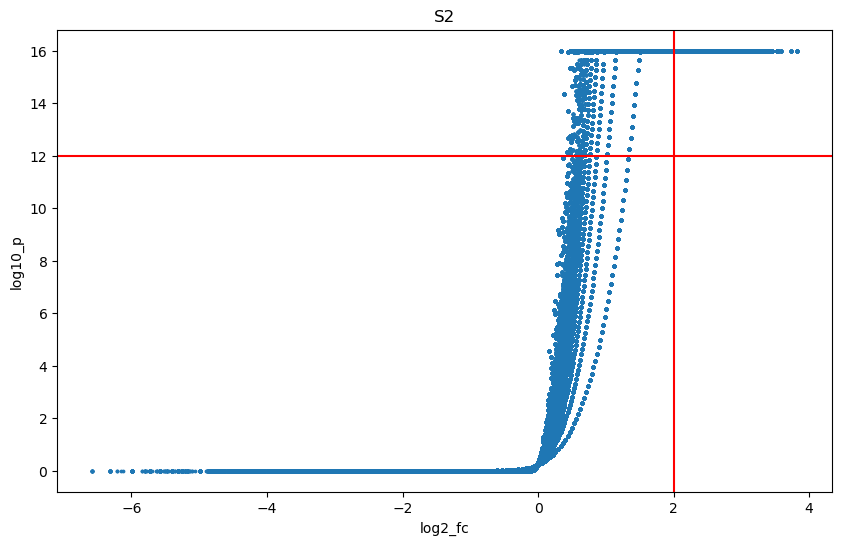

P1 89923


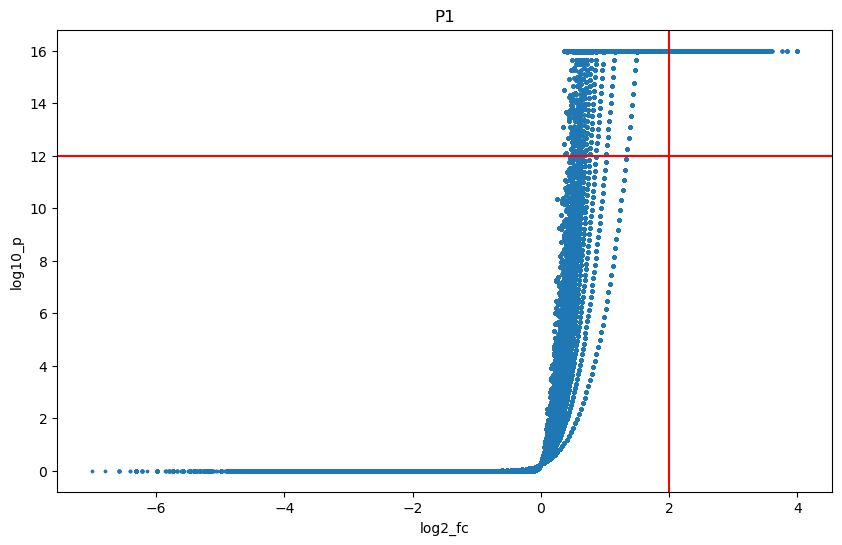

P2 85805


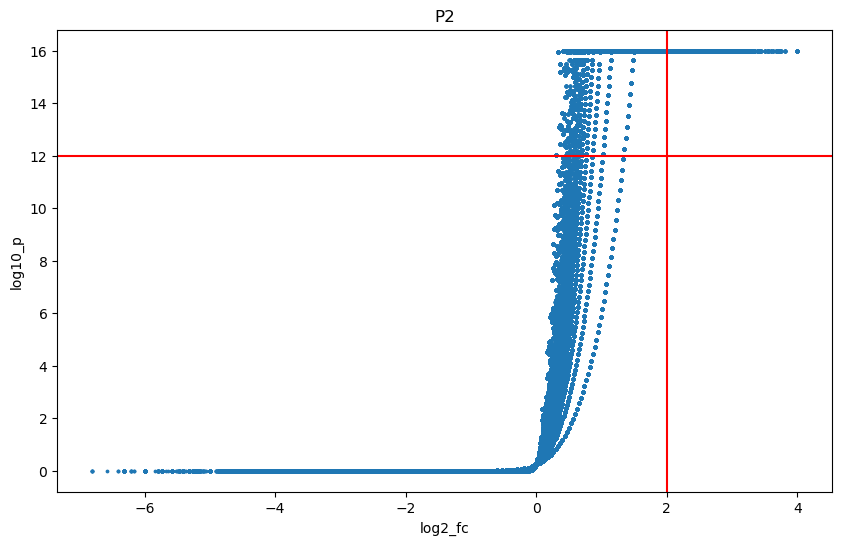

Q1 83618


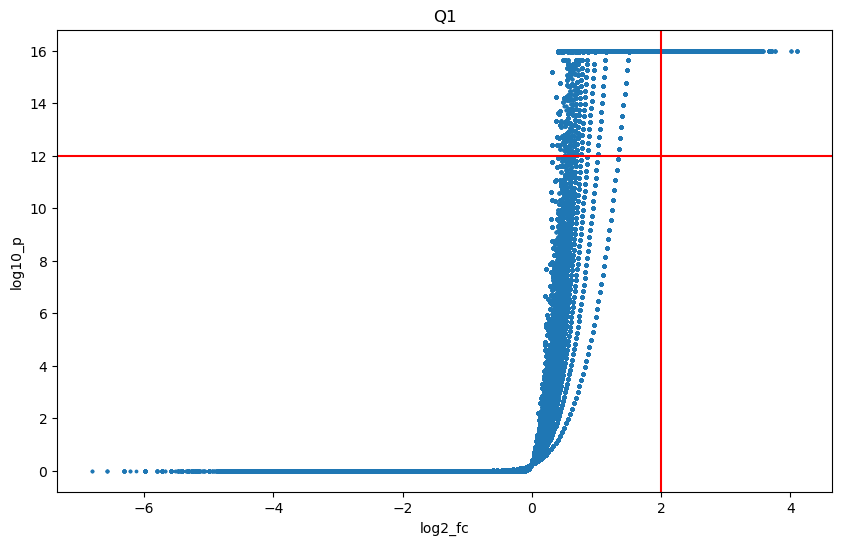

Q2 78759


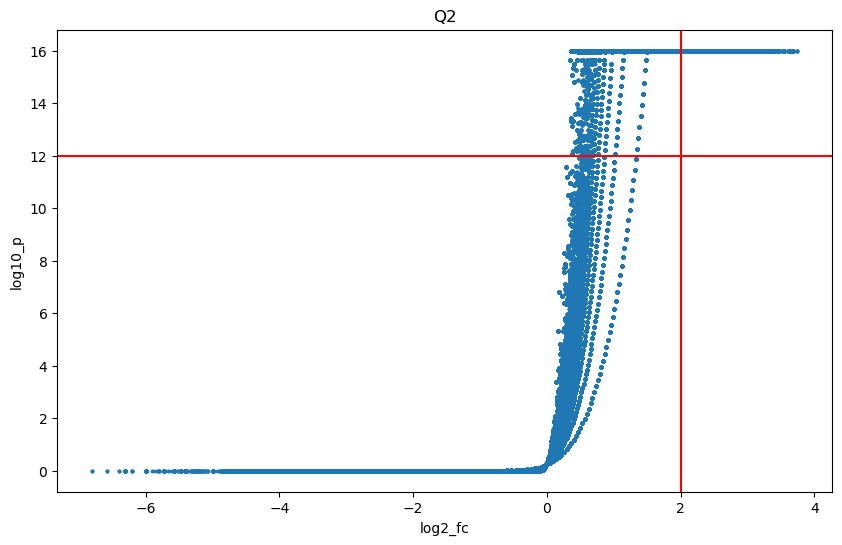

S1 72573


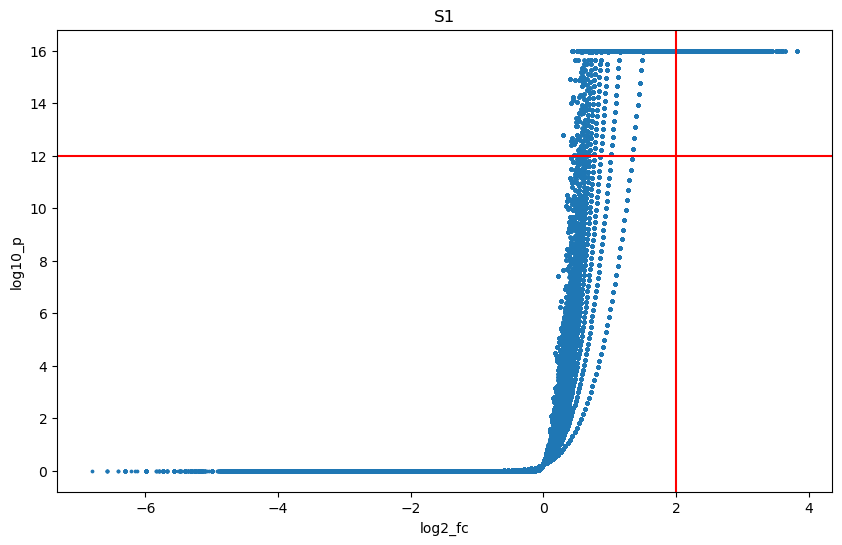

S2 74436


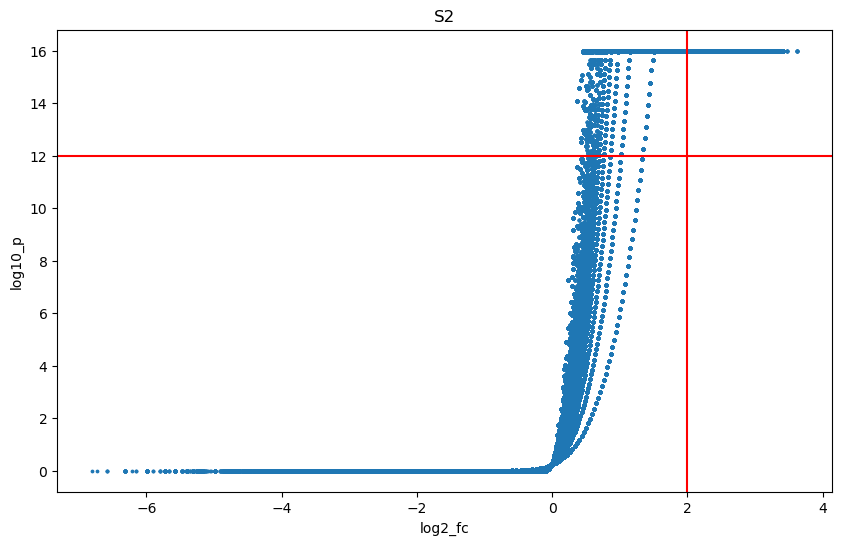

P1 95386


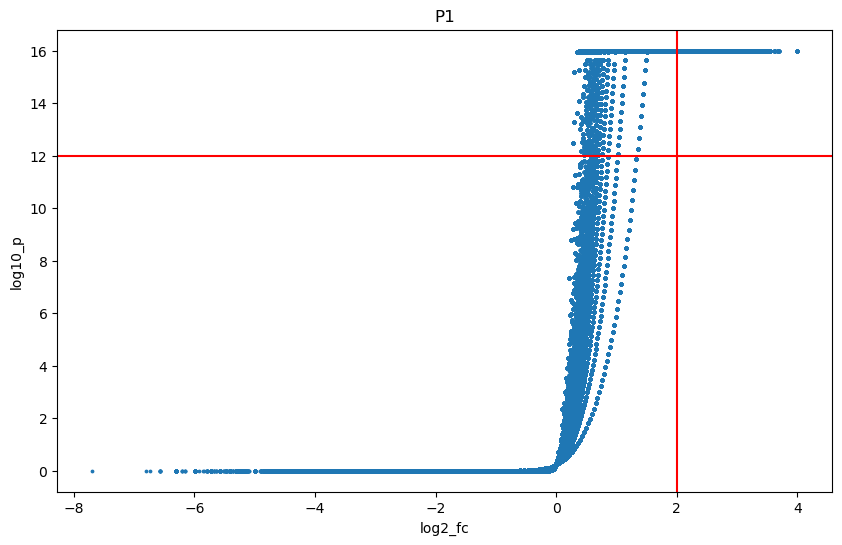

P2 100032


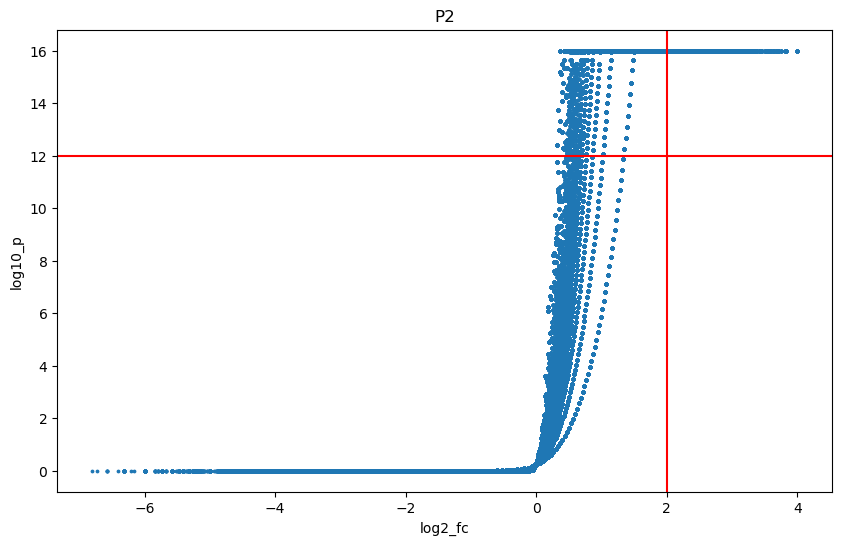

Q1 79329


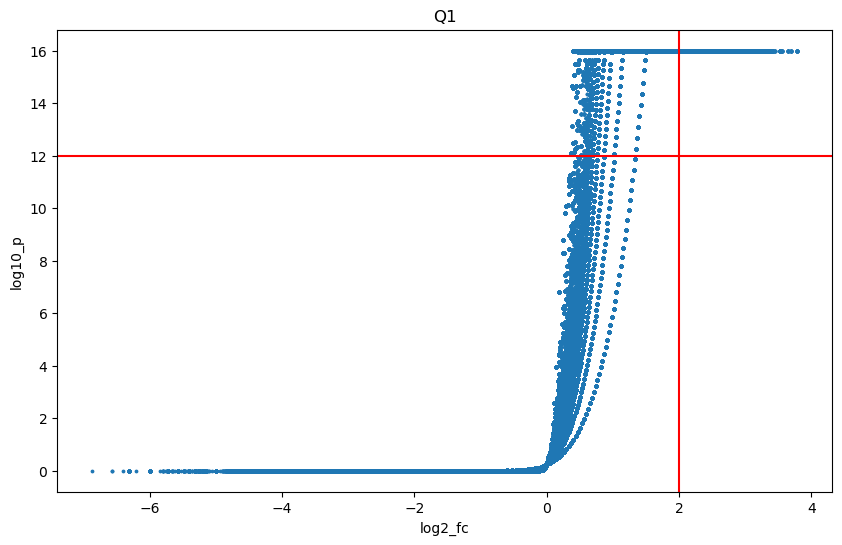

Q2 81469


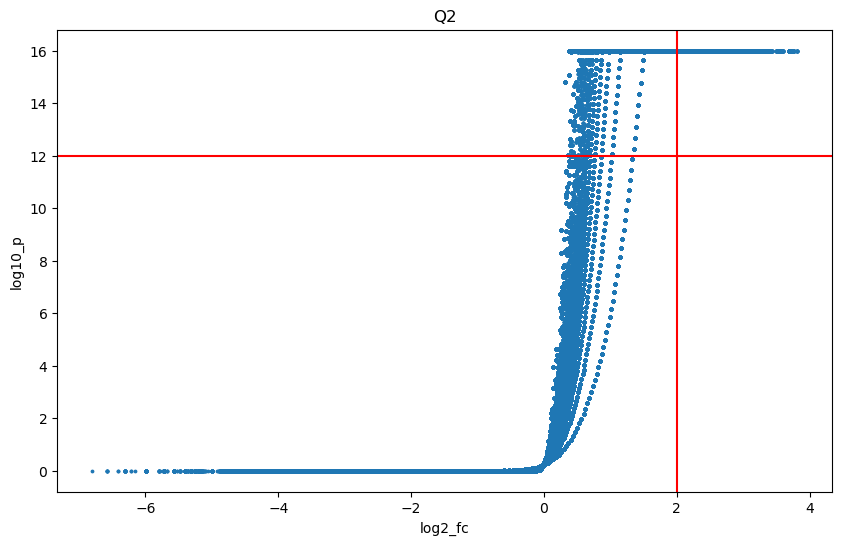

,cdr3,cluster_id,pat,log10_p,log2_fc,count,freq,cdr3nt,cdr3aa,v,...,DEnd,JStart,degree.s,group.count.s,group2.count.s,degree.c,group.count.c,group2.count.c,p.value.g,p.value.g2
0,CASIGEKLFF,731,S1pre,16.000000,1.891738,1,1.025846e-07,TGCGCCAGCATCGGTGAAAAACTGTTTTTT,CASIGEKLFF,TRBV5-1,...,-1,-1,117,9748051,228,0,306553,0,0.000000e+00,1.000000e+00
1,CASNRGTNTEAFF,770,S1pre,16.000000,1.667306,1,1.025846e-07,TGCGCCAGCAACAGGGGGACGAACACTGAAGCTTTCTTT,CASNRGTNTEAFF,TRBV10-2,...,-1,-1,100,9748051,1070,0,306553,26,0.000000e+00,7.771561e-16
2,CATGGSGNTIYF,0,S1pre,16.000000,1.667306,1,1.025846e-07,TGTGCCACCGGTGGCTCTGGAAACACCATATATTTT,CATGGSGNTIYF,TRBV24-1,...,-1,-1,100,9748051,545,0,306553,1,0.000000e+00,1.000000e+00
3,CASSGDPGYTF,376,S1pre,15.352530,1.128036,1,1.025846e-07,TGTGCCAGCAGCGGGGATCCTGGCTACACCTTC,CASSGDPGYTF,TRBV13,...,-1,-1,138,9748051,1343,1,306553,2,4.440892e-16,1.000000e+00
4,CARRDYGYTF,732,S1pre,16.000000,2.042518,1,1.025846e-07,TGTGCCAGACGTGACTATGGCTACACCTTC,CARRDYGYTF,TRBV7-8,...,-1,-1,130,9748051,113,0,306553,0,0.000000e+00,7.552463e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979995,CASIGTYEQYF,377,Q2,16.000000,1.662537,1,1.025846e-07,TGTGCCAGCATAGGGACTTACGAGCAGTACTTC,CASIGTYEQYF,TRBV28,...,-1,-1,301,9748051,2739,2,306553,115,0.000000e+00,0.000000e+00
979996,CASSRLSAYEQYF,772,Q2,16.000000,2.107127,1,1.025846e-07,TGTGCCAGCAGCCGACTGTCCGCCTACGAGCAGTACTTC,CASSRLSAYEQYF,TRBV13,...,-1,-1,136,9748051,10137,0,306553,27,0.000000e+00,1.000000e+00
979997,CARQTYEQYF,731,Q2,16.000000,1.939832,1,1.025846e-07,TGTGCCCGACAAACCTACGAGCAGTACTTC,CARQTYEQYF,TRBV9,...,-1,-1,121,9748051,929,0,306553,3,0.000000e+00,1.000000e+00
979998,CASDREAYEQYF,2,Q2,13.501271,1.401412,1,1.025846e-07,TGTGCCAGCGACAGGGAGGCCTACGAGCAGTACTTC,CASDREAYEQYF,TRBV27,...,-1,-1,83,9748051,9524,0,306553,111,3.153033e-14,6.022349e-01


In [14]:
all_pats_top = pd.DataFrame()

for pat in comp_dict.values():

    
    data_pat = pd.read_csv(f'/home/dluppov/twins_properly_sampled/{pat}_pre/OLGA_vdj_nt_single_1.txt', sep = '\t')
    
    fold = ((data_pat['degree.s'] + 1)/data_pat['group.count.s'])/((data_pat['degree.c'] + 1)/data_pat['group.count.c'])
    log2_fc = np.log2(fold)
    log10_p = -np.log10(data_pat['p.value.g'].apply(lambda x: x if x > 10**(-16) else 10**(-16)))
    
    
    data_pat.insert(0, 'log2_fc', log2_fc)
    data_pat.insert(0, 'log10_p', log10_p)
    
    data_pat = data_pat[np.logical_and(data_pat.log2_fc > 1, data_pat.log10_p > 12)]
    #data_pat = data_pat.sample(n = 2*10**3, replace = False)
    data_pat.insert(0, 'pat', pat + 'pre')
    
    print(pat, len(data_pat))
    
    plt.figure(figsize=(10, 6))
    plt.title(pat)
    plt.scatter(log2_fc, log10_p, s = 3)
    plt.axvline(2, c = 'r')
    plt.axhline(12, c='r')
    plt.xlabel('log2_fc')
    plt.ylabel('log10_p')
    plt.show()
    
    
    all_pats_top = pd.concat([all_pats_top, data_pat])
    
for pat in comp_dict.values():

    
    #data_pat = pd.read_csv(f'/home/dluppov/twins_sampled/{pat}_0_concutedsampled/OLGA_vdj_nt_single_1.txt', sep = '\t')
    
    data_pat = pd.read_csv(f'/home/dluppov/twins_properly_sampled/{pat}_0/OLGA_vdj_nt_single_1.txt', sep = '\t')
    
    fold = ((data_pat['degree.s'] + 1)/data_pat['group.count.s'])/((data_pat['degree.c'] + 1)/data_pat['group.count.c'])
    log2_fc = np.log2(fold)
    log10_p = -np.log10(data_pat['p.value.g'].apply(lambda x: x if x > 10**(-16) else 10**(-16)))
    
    
    data_pat.insert(0, 'log2_fc', log2_fc)
    data_pat.insert(0, 'log10_p', log10_p)
    
    data_pat = data_pat[np.logical_and(data_pat.log2_fc > 1, data_pat.log10_p > 12)]
    #data_pat = data_pat.sample(n = 2*10**3, replace = False)
    data_pat.insert(0, 'pat', pat)
    
    print(pat, len(data_pat))
    
    plt.figure(figsize=(10, 6))
    plt.title(pat)
    plt.scatter(log2_fc, log10_p, s = 3)
    plt.axvline(2, c = 'r')
    plt.axhline(12, c='r')
    plt.xlabel('log2_fc')
    plt.ylabel('log10_p')
    plt.show()
    
    
    all_pats_top = pd.concat([all_pats_top, data_pat])
    

# start = time.time()
# res = process_all_lenghts(all_pats_top)
# end = time.time()

# print('Parallel process hamming', end - start)
# print(len(res[0].union(*res)))

# pd.Series(res).to_csv('/home/dluppov/twins_analysis/cluster_counts_whole_samp_mixed_neg_presamp_2.csv')    

res = pd.read_csv('/home/dluppov/twins_analysis/cluster_counts_whole_samp_mixed_neg_presamp_2.csv', index_col=0)
res = res['0'].apply(eval)

exploded_series = res.explode()

res_exploded = pd.DataFrame(exploded_series).reset_index()
res_exploded.rename(columns = {"0": 'cdr3', 'index': 'cluster_id'}, inplace=True)
res_exploded.set_index('cdr3', inplace=True)

cdr3_set = set(res_exploded.index)

all_pats_top = all_pats_top.loc[all_pats_top.cdr3aa.apply(lambda x: x in cdr3_set)]


to_plot_conc = pd.concat([res_exploded.loc[list(all_pats_top.cdr3aa)].reset_index(), all_pats_top.reset_index(drop=True)], axis = 1)
to_plot_conc

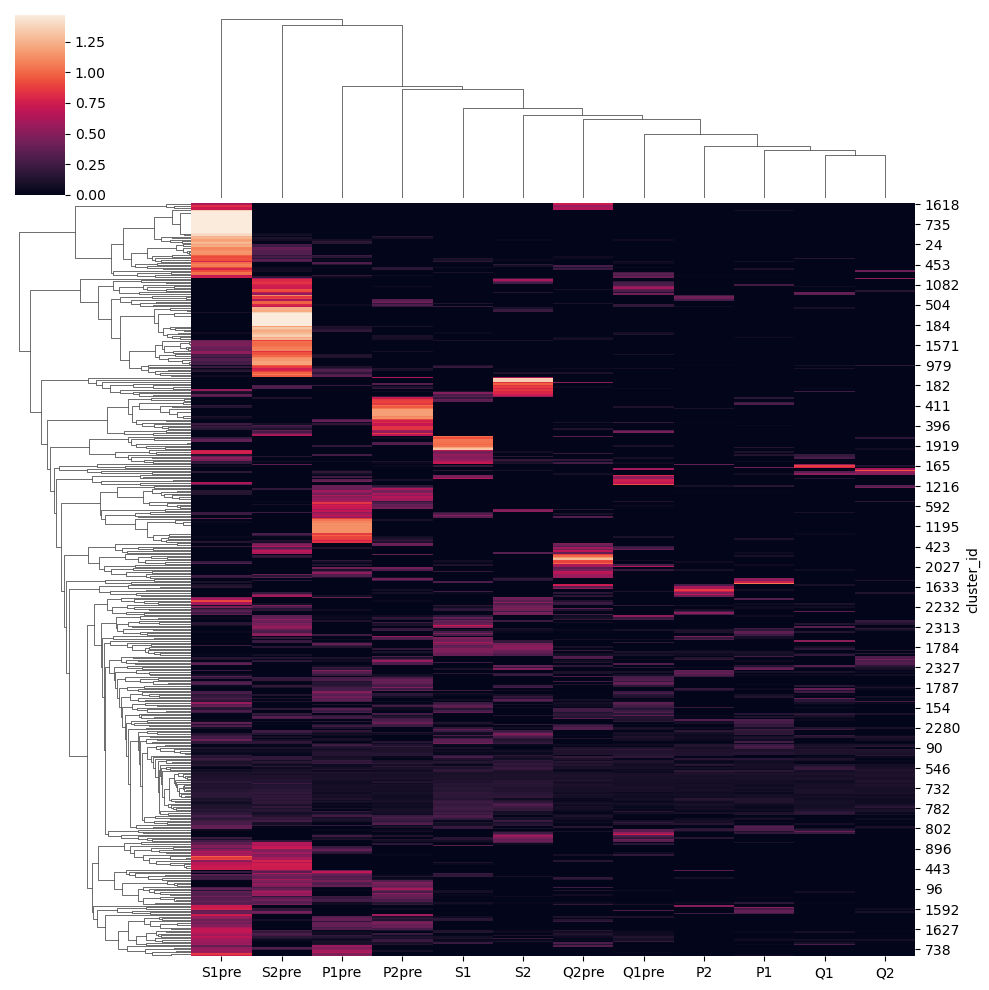

In [23]:
to_plot_conc = pd.concat([res_exploded.loc[list(all_pats_top.cdr3aa)].reset_index(), all_pats_top.reset_index(drop=True)], axis = 1)

pats = ['P1','P2','S1','S2','Q1','Q2', 'P1pre','P2pre','S1pre','S2pre','Q1pre','Q2pre']

clusters_size_dict = to_plot_conc.cluster_id.value_counts().to_dict()

to_plot_conc.insert(0, 'cluster_size', to_plot_conc.cluster_id.apply(lambda x: clusters_size_dict[x]))

dummies_conc = pd.concat([to_plot_conc.drop('pat', axis = 1), pd.get_dummies(to_plot_conc.pat)], axis = 1)
dummies_conc = dummies_conc[dummies_conc.cluster_size > 10]

cluster_counts = dummies_conc[['cluster_id'] + pats].groupby('cluster_id').apply(sum).drop('cluster_id', axis = 1)
cluster_counts.insert(0, 'total_count', cluster_counts.sum(axis = 1))

cluster_freqs = cluster_counts.apply(lambda x: x/cluster_counts.total_count).drop('total_count', axis = 1)

cluster_freqs_advanced = cluster_freqs*10**5/cluster_counts[cluster_freqs.columns].sum()
sns.clustermap(cluster_freqs_advanced)

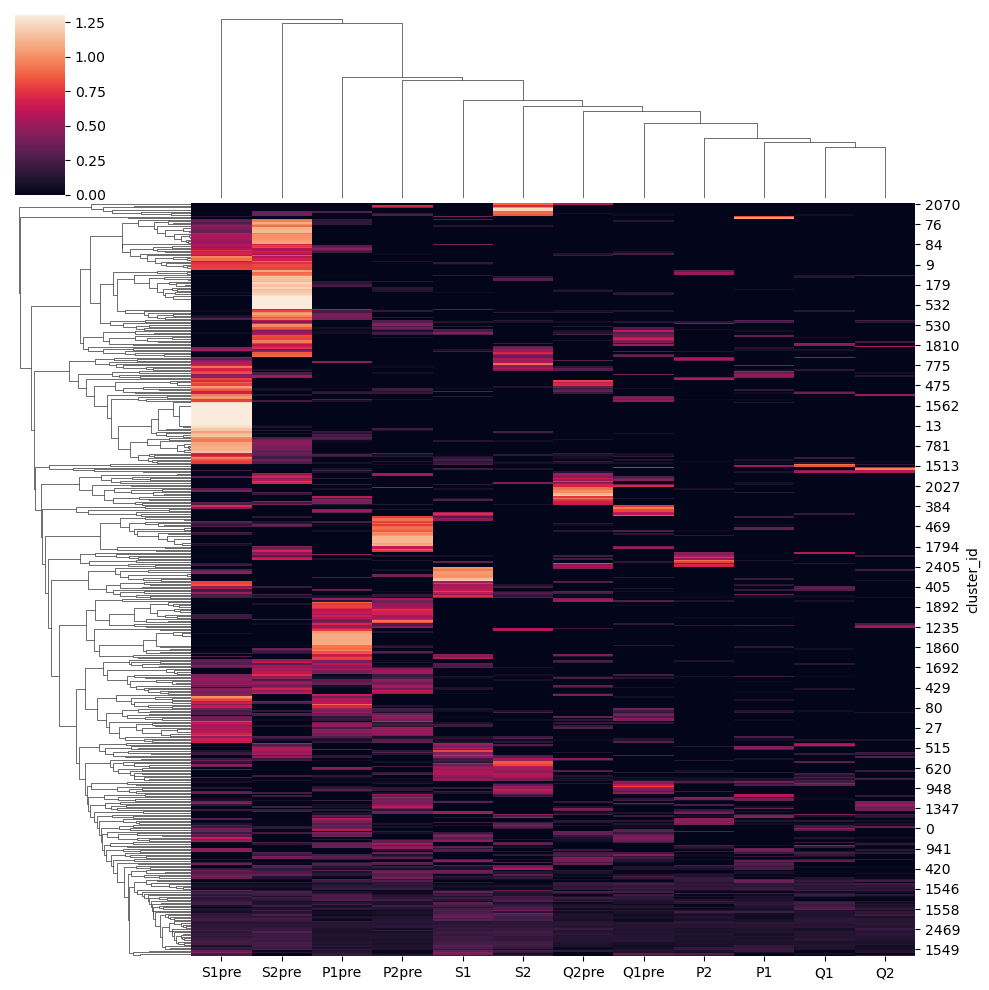

In [24]:
cluster_freqs_advanced_log = cluster_freqs_advanced.applymap(lambda x: np.log2(x+1))
sns.clustermap(cluster_freqs_advanced_log)

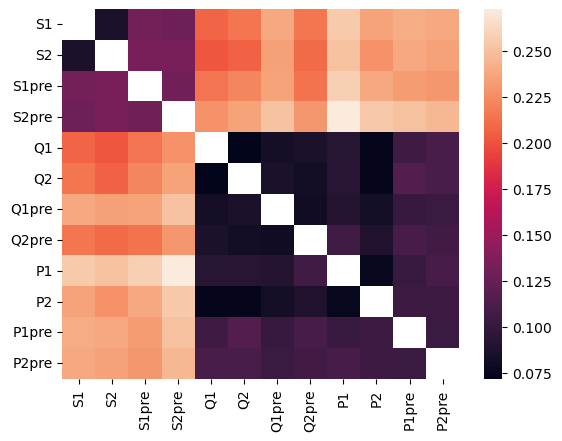

In [29]:
jensenshannon_dict_dif = {}
for pat in pats:
    jensenshannon_dict_dif[pat] = {}
    for pat1 in pats:
        jensenshannon_dict_dif[pat][pat1] =  scp.spatial.distance.jensenshannon((cluster_counts/cluster_counts.sum())[pat],
                                                                                (cluster_counts/cluster_counts.sum())[pat1])
        
sns.heatmap(pd.DataFrame(jensenshannon_dict_dif).applymap(lambda x: np.nan if x == 0 else x))
plt.savefig('/home/dluppov/Paper_figs/Fig11/fig11c.svg', format = 'svg')

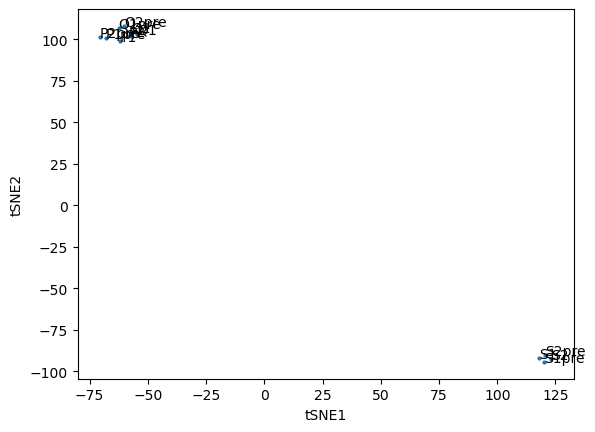

In [30]:
freqs_data = cluster_counts/cluster_counts.sum()
freqs_data.drop('total_count', inplace = True, axis = 1)

tsne = TSNE(n_components=2,  perplexity = 3)
tsne_res = tsne.fit_transform(freqs_data.T).T

fig, ax = plt.subplots()
ax.scatter(tsne_res[0], tsne_res[1], s=4)

for i, txt in enumerate(freqs_data.columns):
    ax.annotate(txt, (tsne_res[0][i], tsne_res[1][i]))

plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.savefig('/home/dluppov/Paper_figs/Fig11/fig11d.svg', format = 'svg')